In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

Write a program to numerically evaluate the derivative of 
f(x)=cos x at an arbitrary position x

In [2]:
def derifw(y,x,dx):
    return (y(x+dx)-y(x))/dx

def dericd(y,x,dx):
    return (y(x+dx/2.)-y(x-dx/2.))/dx

def deried(y,x,dx):
    cd1 = dericd(y, x, dx)
    cd2 = dericd(y, x, dx/2.)
    return (4.*cd2-cd1)/3.

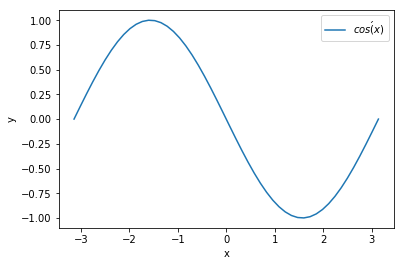

In [44]:
dx = (np.finfo(float).eps)**0.2
x = np.linspace(-np.pi, np.pi)
y = deried(np.cos, x, dx)
plt.plot(x, y,label=r'$cos\'(x)$')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

1) Evaluate the derivative at position x using the forward 
difference scheme. Plot log(Error)=log10|f’(numerically)
-
f’(analytic)| against log10(dx) for dx=1e
-
16,1e
-
15,
...
.,0.1 at 
x=
π
/4. You should find Error~dx
n
; what is n? what is the 
optimal value for dx.

In [47]:
dx = 10.**np.arange(-16,0)

In [48]:
numerical = derifw(np.cos, np.pi/4., dx)
logError  = np.log10(abs(numerical - (-1./np.sqrt(2.)) ))

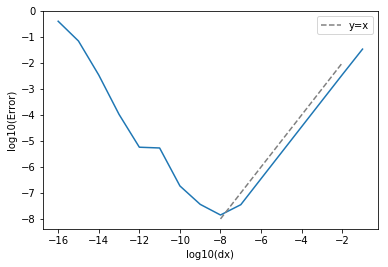

In [49]:
plt.plot(np.log10(dx), logError)
plt.plot(np.linspace(-8,-2), np.linspace(-8,-2), '--', color='grey', label='y=x')
plt.xlabel('log10(dx)')
plt.ylabel('log10(Error)')
plt.legend()
# n is 1
# the optimal dx ~ 1e-8

2) Repeat the exercise fusing the central difference scheme. 
Why this scheme is better?

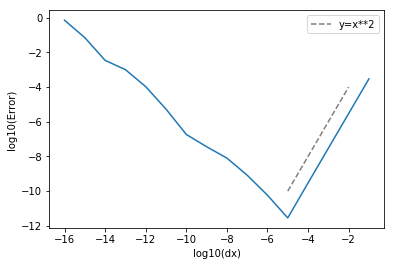

In [53]:
numerical = dericd(np.cos, np.pi/4., dx)
logError  = np.log10(abs(numerical - (-1./np.sqrt(2.)) ))

plt.plot(np.log10(dx), logError)
plt.plot(np.linspace(-5,-2), 2*np.linspace(-5,-2), '--', color='grey', label='y=x**2')
plt.xlabel('log10(dx)')
plt.ylabel('log10(Error)')
plt.legend()
# n is 2
# the optimal dx ~ 3e-5
# This scheme is better since it achieves higher precision using larger dx.
# (because roundoff error increases when h becomes smaller)

3) Repeat (2) for x=0. Why do the results differ?

In [65]:
numerical = dericd(np.cos, 0., dx)
logError  = np.log10(abs(numerical - (0.)) )

# n is 2
# the optimal dx ~ 3e-5
# This scheme is better since it achieves higher precision using larger dx.
# (because roundoff error increases when h becomes smaller)

/homes/shjzhang/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  


In [64]:
print (numerical)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


no matter what dx is, the error is always zero. This is because 

\begin{equation}
\frac{d y(t)}{dt}_{cd} = \frac{y(t+h/2)-y(t-h/2)}{h}
\end{equation}

since cos(x) is an even function, y(t+h/2)=y(t-h/2) no matter what h is.